Eigenvalue:
 [ 2.06565474e+01 -6.74829065e-16  2.56845741e+00] 

Eigenvector:
 [[-0.07548516  0.81649658 -0.57239438]
 [-0.62555192  0.40824829  0.66484444]
 [-0.77652224 -0.40824829 -0.47994432]] 

[[-0.07548516  0.57239438 -0.81649658]
 [-0.62555192 -0.66484444 -0.40824829]
 [-0.77652224  0.47994432  0.40824829]]
[2.06565474e+01 2.56845741e+00 6.27731435e-16]
[[-0.07548516 -0.62555192 -0.77652224]
 [ 0.57239438 -0.66484444  0.47994432]
 [ 0.81649658  0.40824829 -0.40824829]]
88.94098221000772
1.0


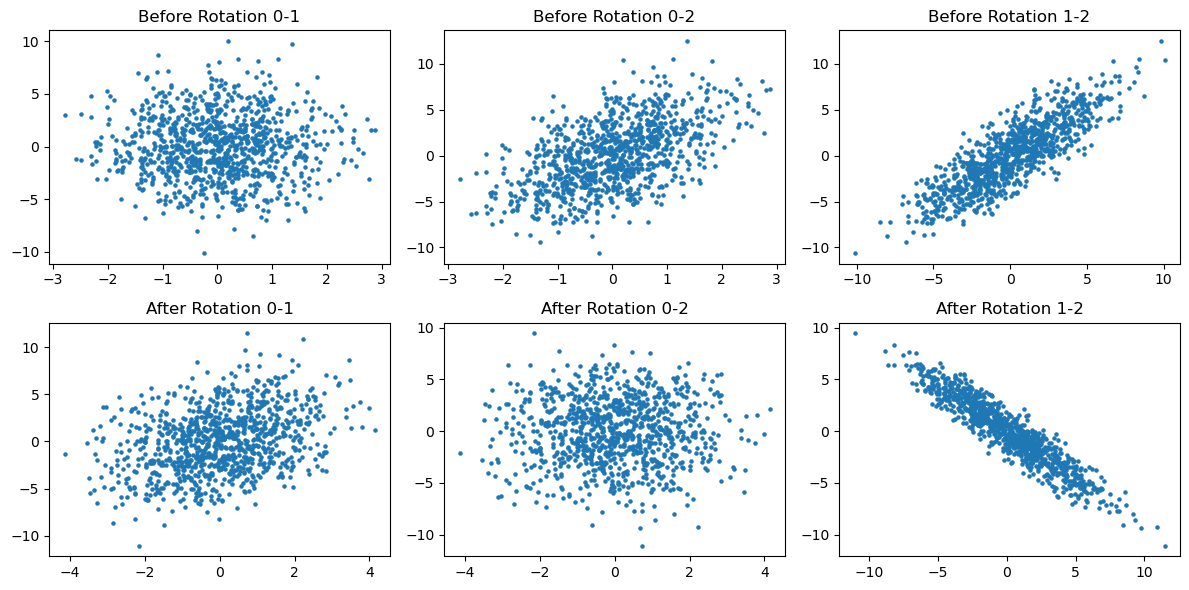

In [1]:
import numpy as np
import pandas as pd
from scipy import linalg as la
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

N = 1000
mu = 0
sigma = 1

x1 = np.random.normal(loc = mu, scale = sigma, size = N)
mu2 = 0
sigma2 = 3
x2 = np.random.normal(loc=mu2, scale = sigma2, size = N)

x3 = 2*x1+x2
X = [x1, x2, x3]

Cov = np.cov(X)
l,V = np.linalg.eig(Cov)

print("Eigenvalue:\n", l,'\n')
print("Eigenvector:\n", V,'\n')
#perform SVD decomposition on the dataset

U, S, Vt = la.svd(Cov)
print( U)
print(S)
print(Vt)

main_component = S[0]/S.sum()
print(main_component*100)
Tf = (S[0]+S[1]) /S.sum()
print(Tf)

Xp = np.dot(V, X)
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(12, 6))                          
[[ax01, ax02, ax03],[ax11, ax12, ax13]] = axes
ax01.scatter(X[0], X[1], s= 5)
ax01.set_title('Before Rotation 0-1')

ax02.scatter(X[0], X[2], s= 5)
ax02.set_title('Before Rotation 0-2')

ax03.scatter(X[1], X[2], s= 5)
ax03.set_title('Before Rotation 1-2')

ax11.scatter(Xp[0], Xp[1], s= 5)
ax11.set_title('After Rotation 0-1')

ax12.scatter(Xp[0], Xp[2], s= 5)
ax12.set_title('After Rotation 0-2')

ax13.scatter(Xp[1], Xp[2], s= 5)
ax13.set_title('After Rotation 1-2')

plt.tight_layout()
plt.show()

[2.06634707e+01 4.00683267e-03 2.58311037e+00]
[[-0.07525897  0.81703504 -0.57165535]
 [-0.62543402  0.40782235  0.66521667]
 [-0.77663915 -0.40759623 -0.48030922]]
[2.06707904e+01 2.58323410e+00 4.00701525e-03]
[[-0.07528761  0.57164988 -0.81703622]
 [-0.62539829 -0.66525033 -0.40782223]
 [-0.77666515  0.4802691   0.40759397]]
[8.88728956e+01 1.72332531e-02 1.11098712e+01]
99.9827667468956


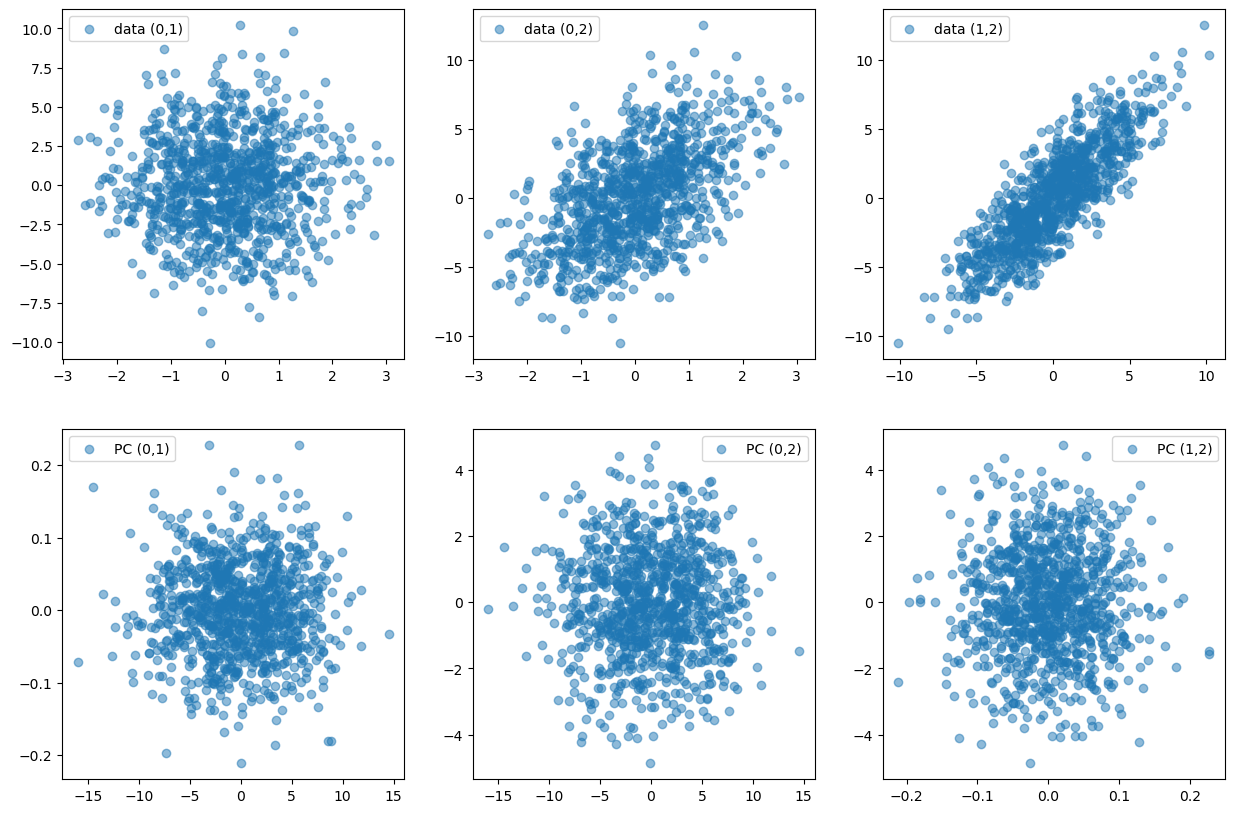

In [2]:
#Q2
noises = np.random.normal(loc=0, scale=1/50, size=(3, N, 10))
Noise = X + np.sum(noises, axis = 2)

Cov1 = np.cov(Noise)
l_1, V_1 = np.linalg.eig(Cov1)
l_1 = np.real_if_close(l_1)
U_1, S_1, Vt_1 = la.svd(Noise)
l_svd_1 = S_1**2/(N-1)
V_svd_1 = U_1

print(l_1)
print(V_1)
print(l_svd_1)
print(V_svd_1)

L= np.diag(l_1)
print((l_1/L.trace())*100)

print((np.sum(l_1[[0,2]])/L.trace())*100)

new1 = np.dot(V_1.T,Noise)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axs[0,0].scatter(Noise[0,:],Noise[1,:], alpha=0.5, label='data (0,1)')
axs[0,0].legend()
axs[0,1].scatter(Noise[0,:],Noise[2,:], alpha=0.5, label='data (0,2)')
axs[0,1].legend()
axs[0,2].scatter(Noise[1,:],Noise[2,:], alpha=0.5, label='data (1,2)')
axs[0,2].legend()
axs[1,0].scatter(new1[0,:],new1[1,:], alpha=0.5, label='PC (0,1)')
axs[1,0].legend()
axs[1,1].scatter(new1[0,:],new1[2,:], alpha=0.5, label='PC (0,2)')
axs[1,1].legend()
axs[1,2].scatter(new1[1,:],new1[2,:], alpha=0.5, label='PC (1,2)')
axs[1,2].legend()

plt.show()


In [3]:
#Q3
import pandas as pd


data = pd.read_csv('data/magic04.data')
D_N = data.to_numpy()

D_N= D_N[0:,0:10]
D_N = np.asarray(D_N,dtype='float32')
D_N = D_N.T
Cov = np.cov(D_N)
l, V  = la.eig(Cov) 
l = np.real_if_close(l)
Np = np.dot(V.T, D_N) 
lam = np.diag(l)
for i in range(len(l)):
    print('The selected component : ' + str(i) +'. by this component %.2f%% of the Whole variability achived' % (100*abs((lam[i,i]/lam.trace()))))

sort_l = np.sort(l) 
sort_l = sort_l[::-1] 

total_variability = 0
number_of_features = 0
for i in range(len(sort_l)):
    if total_variability >= 99:
        break
    total_variability += abs(100*(sort_l[i]/lam.trace()))
    number_of_features +=1


The selected component : 0. by this component 44.04% of the Whole variability achived
The selected component : 1. by this component 25.80% of the Whole variability achived
The selected component : 2. by this component 13.50% of the Whole variability achived
The selected component : 3. by this component 8.88% of the Whole variability achived
The selected component : 4. by this component 4.08% of the Whole variability achived
The selected component : 5. by this component 2.90% of the Whole variability achived
The selected component : 6. by this component 0.79% of the Whole variability achived
The selected component : 7. by this component 0.00% of the Whole variability achived
The selected component : 8. by this component 0.00% of the Whole variability achived
The selected component : 9. by this component 0.00% of the Whole variability achived
